In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler




In [ ]:
df = pd.read_csv('spotify_churn_dataset.csv')
display(df)
print(df.shape)
print(df.columns.tolist())


,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7996,Other,44,DE,Student,237,36,0.30,Mobile,0,1,1
7996,7997,Male,34,AU,Premium,61,64,0.59,Mobile,0,1,0
7997,7998,Female,17,US,Free,81,62,0.33,Desktop,5,0,0
7998,7999,Female,34,IN,Student,245,94,0.27,Desktop,0,1,0


(8000, 12)
['user_id', 'gender', 'age', 'country', 'subscription_type', 'listening_time', 'songs_played_per_day', 'skip_rate', 'device_type', 'ads_listened_per_week', 'offline_listening', 'is_churned']


In [4]:
missing_values = df.isnull().sum()
missing_values

user_id                  0
gender                   0
age                      0
country                  0
subscription_type        0
listening_time           0
songs_played_per_day     0
skip_rate                0
device_type              0
ads_listened_per_week    0
offline_listening        0
is_churned               0
dtype: int64

In [5]:
print(df.dtypes)

user_id                    int64
gender                    object
age                        int64
country                   object
subscription_type         object
listening_time             int64
songs_played_per_day       int64
skip_rate                float64
device_type               object
ads_listened_per_week      int64
offline_listening          int64
is_churned                 int64
dtype: object


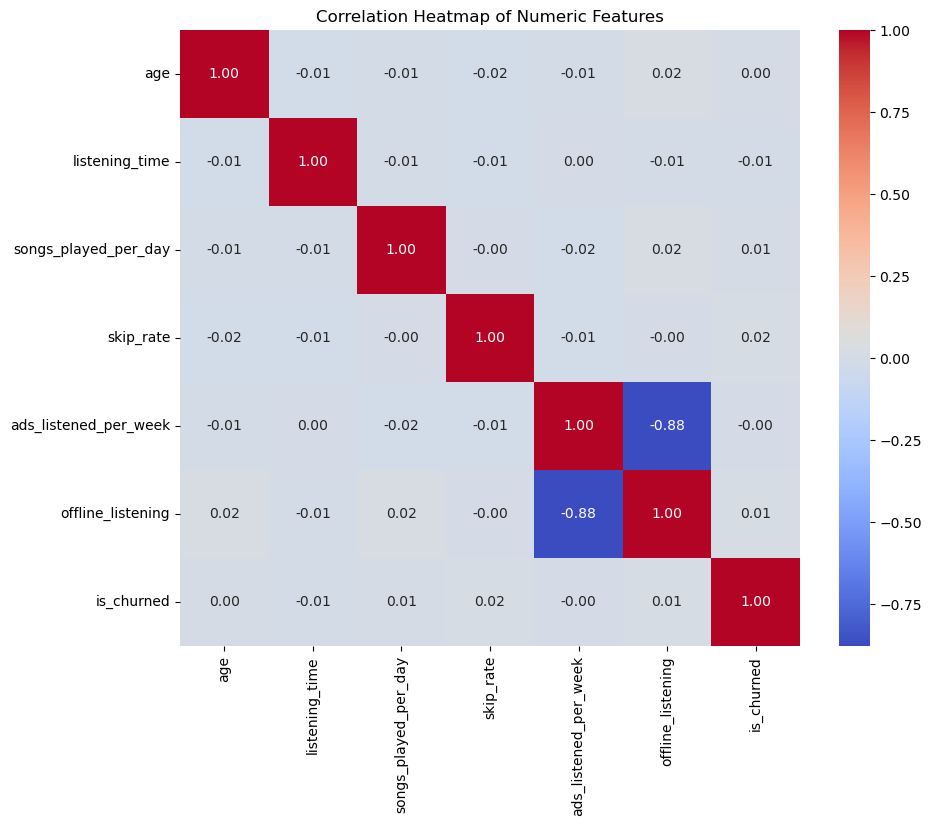

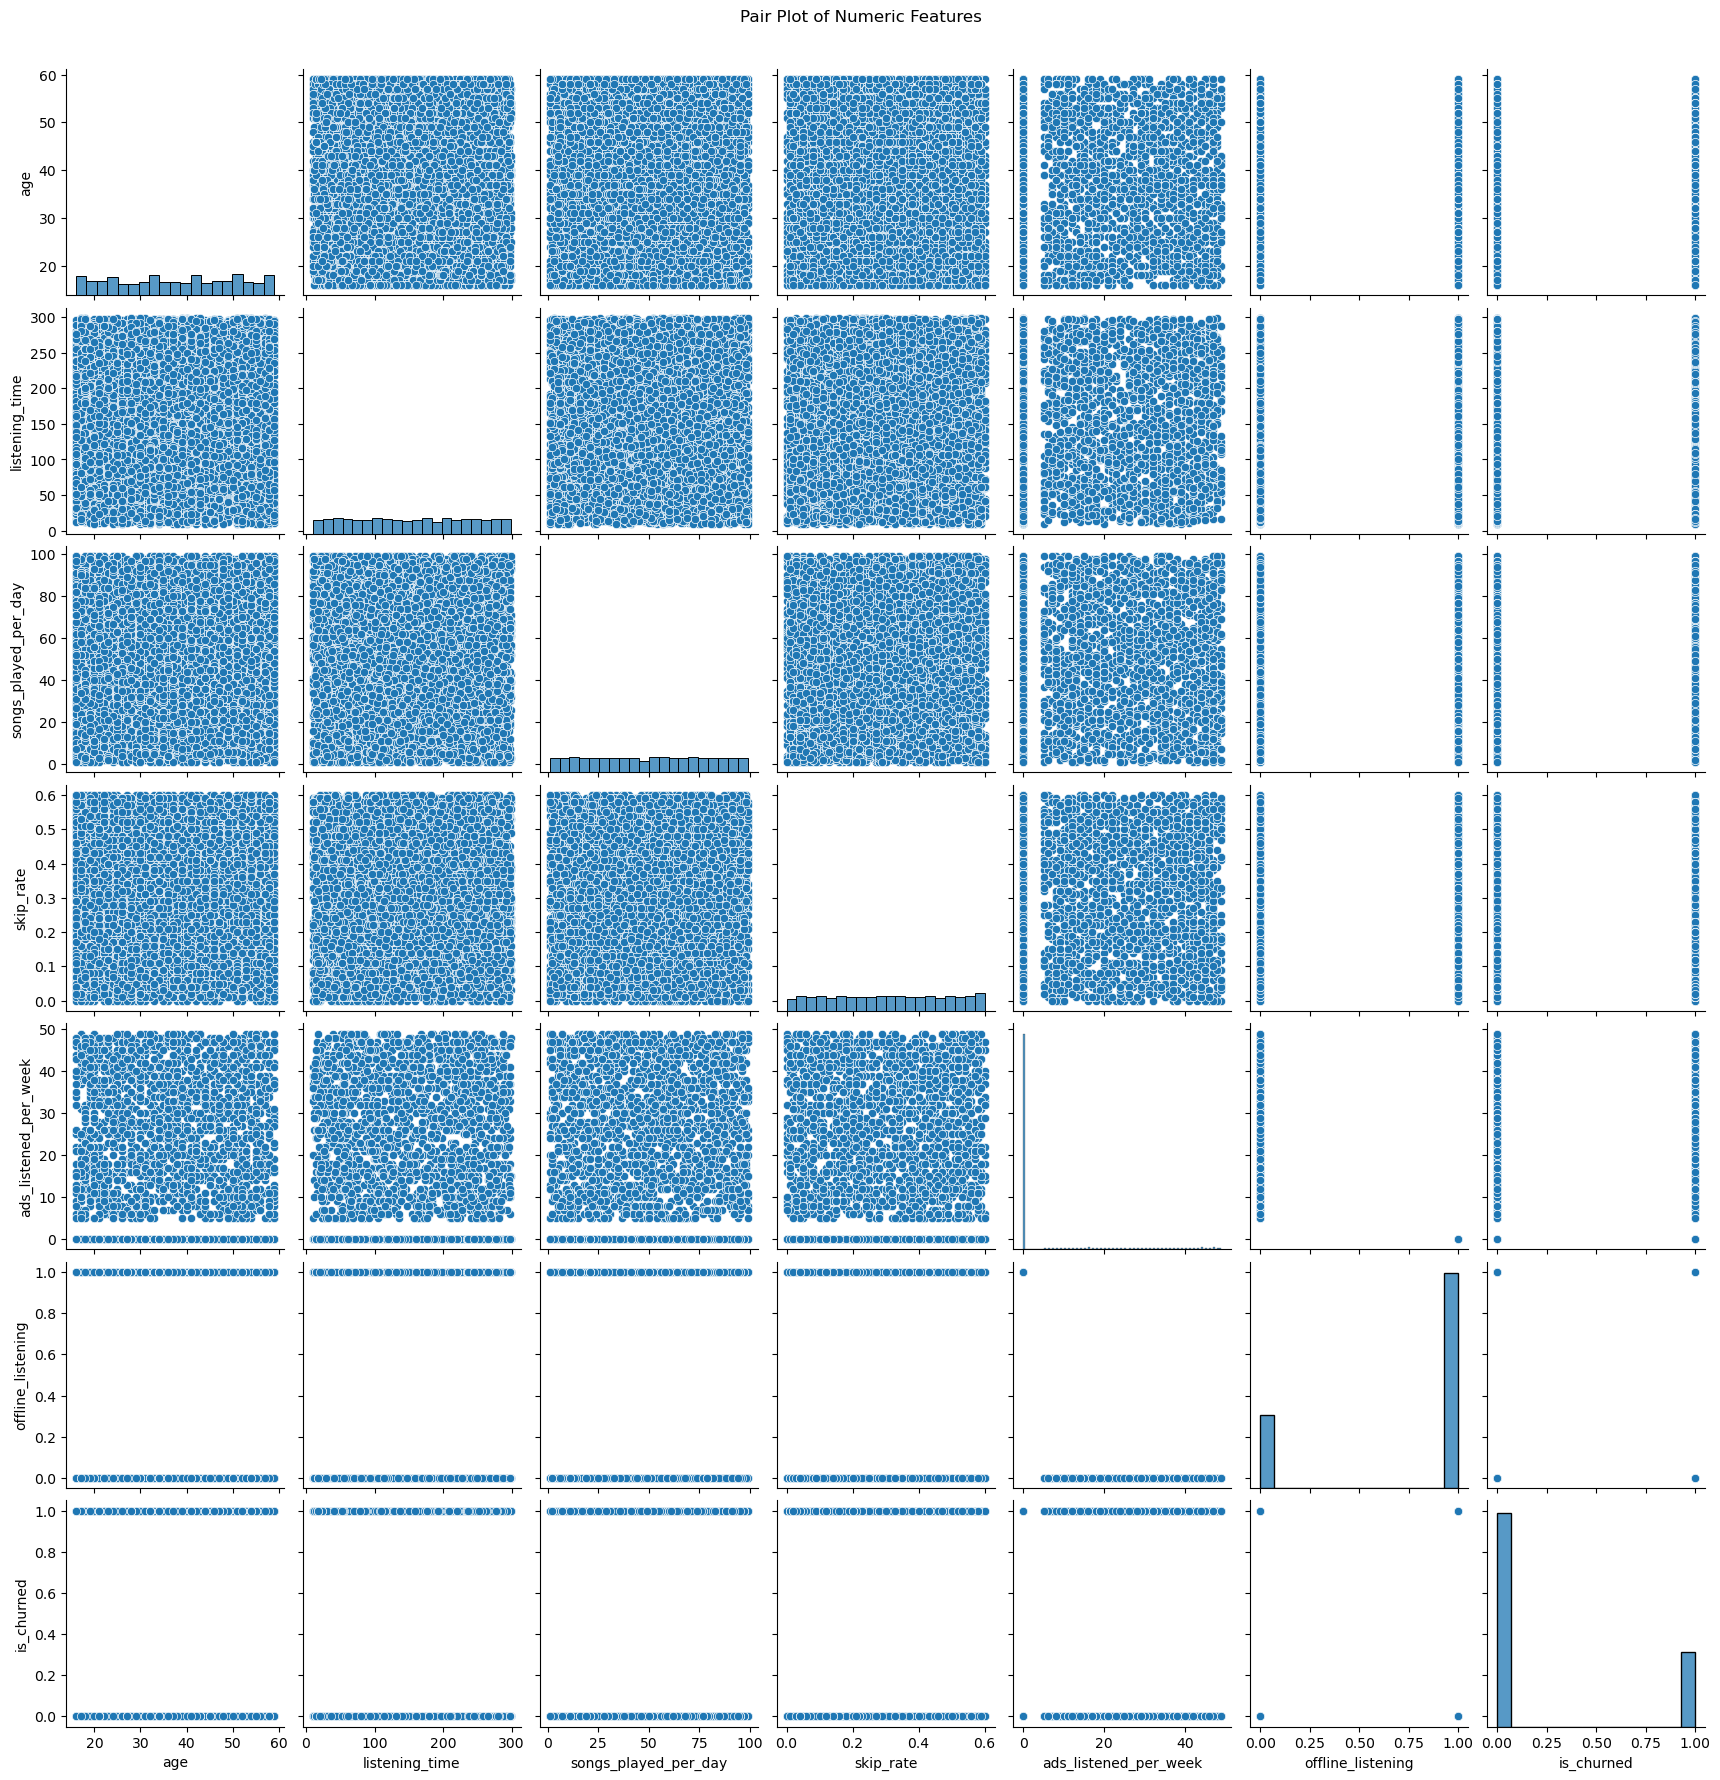

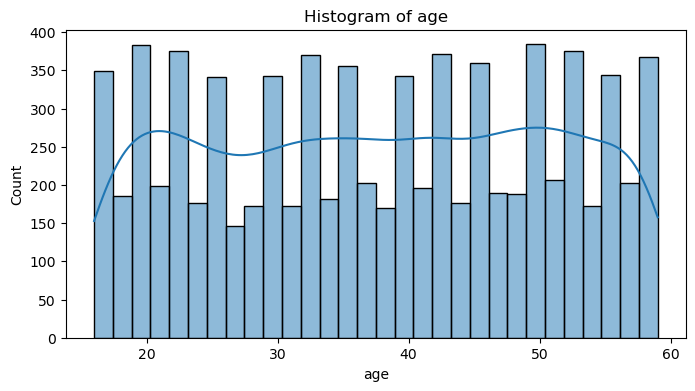

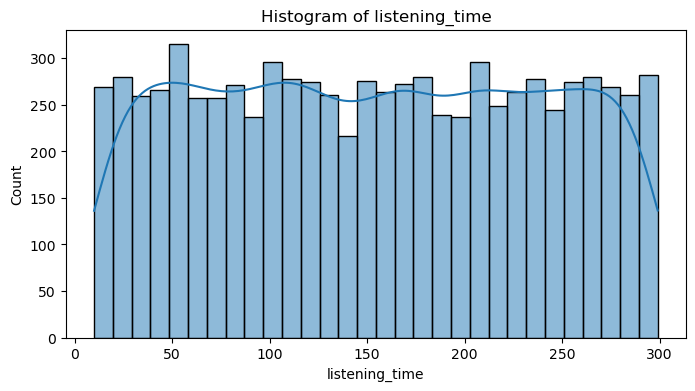

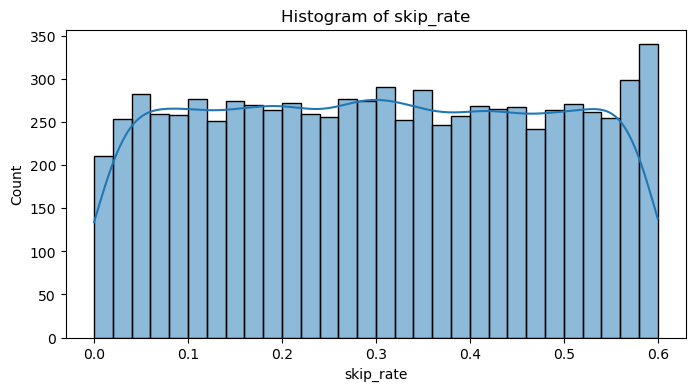

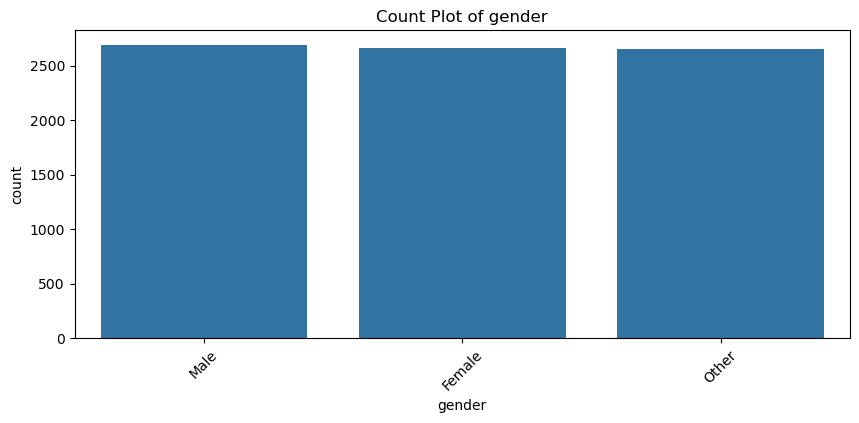

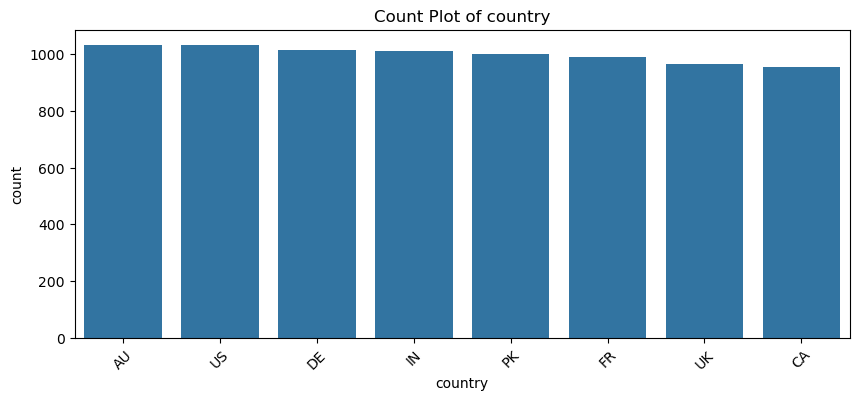

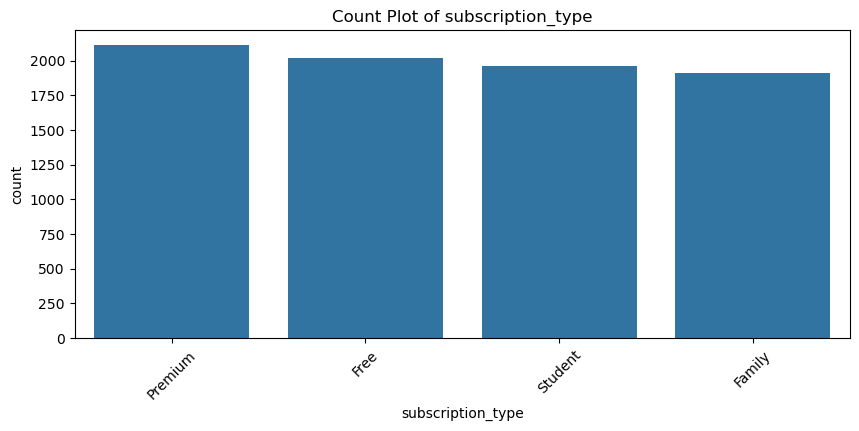

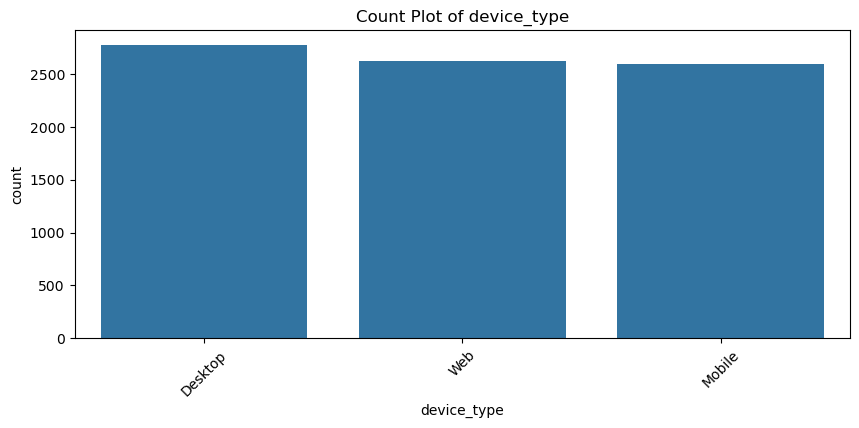

/var/folders/07/1hr7xxpj3sx52fsnpz87jfj40000gp/T/ipykernel_60942/3686797531.py:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='subscription_type', y='listening_time', ci=None, order=df['subscription_type'].value_counts().index)


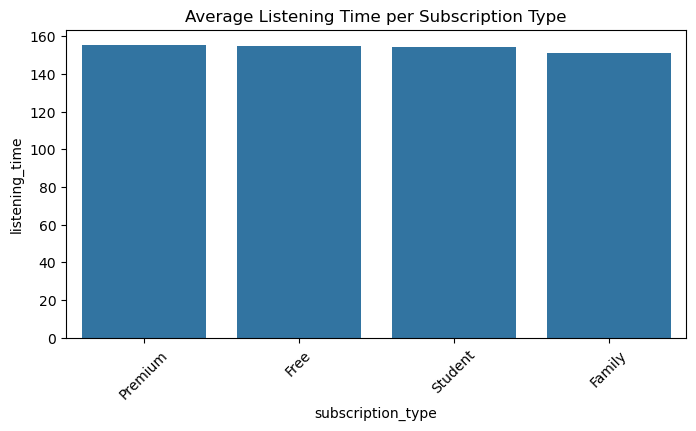

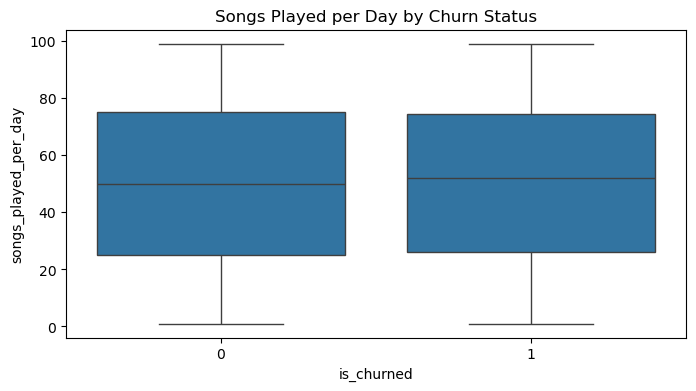

In [5]:
# List of numeric columns (excluding 'user_id' as it is an identifier)
numeric_cols = ['age', 'listening_time', 'songs_played_per_day', 'skip_rate', 'ads_listened_per_week', 'offline_listening', 'is_churned']
numeric_df = df[numeric_cols]

# Check the number of numeric columns
if len(numeric_df.columns) >= 4:
    plt.figure(figsize=(10, 8))
    corr_matrix = numeric_df.corr()
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.savefig('correlation_heatmap.png')
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap.')

# Pair Plot of numeric features
sns.pairplot(numeric_df)
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.savefig('pairplot_numeric.png')
plt.show()

# Histograms for selected numeric features
features_to_hist = ['age', 'listening_time', 'skip_rate']
for feature in features_to_hist:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Histogram of {feature}')
    plt.show()

# Count plots for categorical variables
categorical_cols = ['gender', 'country', 'subscription_type', 'device_type']
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

# Grouped barplot: Average listening time per subscription type
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x='subscription_type', y='listening_time', ci=None, order=df['subscription_type'].value_counts().index)
plt.title('Average Listening Time per Subscription Type')
plt.xticks(rotation=45)
plt.show()

# Box plot for songs played per day by churn status
plt.figure(figsize=(8, 4))
sns.boxplot(x='is_churned', y='songs_played_per_day', data=df)
plt.title('Songs Played per Day by Churn Status')
plt.show()


## Data preprocesssing

In [6]:
df_model = df.drop('user_id', axis=1)

categorical_features = ['gender', 'country', 'subscription_type', 'device_type']
df_model_encoded = pd.get_dummies(df_model, columns=categorical_features, drop_first=True)

X = df_model_encoded.drop('is_churned', axis=1)
y = df_model_encoded['is_churned']


In [7]:
numeric_cols = ['age', 'listening_time', 'songs_played_per_day', 
                'skip_rate', 'ads_listened_per_week', 'offline_listening']

scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [9]:
X_train_np = X_train.to_numpy().T   
y_train_np = y_train.to_numpy().reshape(1, -1)

X_test_np = X_test.to_numpy().T
y_test_np = y_test.to_numpy().reshape(1, -1)


In [10]:
print(X_train_np.shape, X_test_np.shape, y_train_np.shape, y_test_np.shape)

(20, 6400) (20, 1600) (1, 6400) (1, 1600)


## Model Building

In [ ]:

# Activation functions
def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return (Z > 0).astype(np.float64)

def sigmoid(Z):
    Z = np.array(Z, dtype=np.float64)  # enforce numpy array
    return 1.0 / (1.0 + np.exp(-Z))

def sigmoid_derivative(A):
    return A * (1 - A)  # A is already sigmoid(Z)


#Initialize parameters
def initialize_params(n_input, n_hidden1, n_hidden2, n_output=1):
    np.random.seed(42)
    params = {
        "W1": (np.random.randn(n_hidden1, n_input) * 0.01).astype(np.float64),
        "b1": np.zeros((n_hidden1, 1), dtype=np.float64),
        "W2": (np.random.randn(n_hidden2, n_hidden1) * 0.01).astype(np.float64),
        "b2": np.zeros((n_hidden2, 1), dtype=np.float64),
        "W3": (np.random.randn(n_output, n_hidden2) * 0.01).astype(np.float64),
        "b3": np.zeros((n_output, 1), dtype=np.float64),
    }
    return params


# Forward pass
def forward(X, params):
    W1, b1, W2, b2, W3, b3 = (
        params["W1"], params["b1"],
        params["W2"], params["b2"],
        params["W3"], params["b3"]
    )

    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)

    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)

    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)   # output

    cache = (X, Z1, A1, Z2, A2, Z3, A3)
    return A3, cache


#Loss
def compute_loss(Y, A3):
    m = Y.shape[1]
    eps = 1e-10
    loss = -(1/m) * np.sum(Y*np.log(A3+eps) + (1-Y)*np.log(1-A3+eps))
    return np.squeeze(loss)  # ensure scalar


#Backward pass
def backward(params, cache, Y):
    m = Y.shape[1]
    W1, W2, W3 = params["W1"], params["W2"], params["W3"]
    X, Z1, A1, Z2, A2, Z3, A3 = cache

    dZ3 = A3 - Y
    dW3 = (1/m) * np.dot(dZ3, A2.T)
    db3 = (1/m) * np.sum(dZ3, axis=1, keepdims=True)

    dA2 = np.dot(W3.T, dZ3)
    dZ2 = dA2 * relu_derivative(Z2)
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

    grads = {
        "dW1": dW1.astype(np.float64), "db1": db1.astype(np.float64),
        "dW2": dW2.astype(np.float64), "db2": db2.astype(np.float64),
        "dW3": dW3.astype(np.float64), "db3": db3.astype(np.float64),
    }
    return grads


# Update step
def update(params, grads, lr=0.01):
    for key in params.keys():
        params[key] = params[key].astype(np.float64) - lr * grads["d" + key]
    return params


#Training loop
def train(X, Y, n_hidden1=64, n_hidden2=32, epochs=1000, lr=0.01):
    n_input = X.shape[0]
    params = initialize_params(n_input, n_hidden1, n_hidden2)

    for epoch in range(epochs):
        A3, cache = forward(X, params)
        loss = compute_loss(Y, A3)
        grads = backward(params, cache, Y)
        params = update(params, grads, lr)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return params


#Prediction & Accuracy
def predict(X, params, threshold=0.5):
    A3, _ = forward(X, params)
    return (A3 > threshold).astype(int)

def accuracy(X, Y, params):
    preds = predict(X, params)
    return np.mean(preds == Y)


In [22]:
print("X_train_np shape:", X_train_np.shape)
print("y_train_np shape:", y_train_np.shape)


X_train_np shape: (20, 6400)
y_train_np shape: (1, 6400)


In [23]:
params = train(X_train_np, y_train_np, epochs=1000, lr=0.01)


Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.6473
Epoch 200, Loss: 0.6194
Epoch 300, Loss: 0.6021
Epoch 400, Loss: 0.5914
Epoch 500, Loss: 0.5846
Epoch 600, Loss: 0.5802
Epoch 700, Loss: 0.5774
Epoch 800, Loss: 0.5755
Epoch 900, Loss: 0.5743


In [27]:

# Check training accuracy
train_acc = accuracy(X_train_np, y_train_np, params)
print(f"Training Accuracy: {train_acc*100:.2f}%")

# If you have test data X_test, Y_test
test_acc = accuracy(X_test_np, y_test_np, params)
print(f"Test Accuracy: {test_acc*100:.2f}%")


Training Accuracy: 74.11%
Test Accuracy: 74.12%


In [32]:

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Predictions (flattened to 1D for sklearn)
y_pred_train = predict(X_train_np, params).flatten()
y_true_train = y_train_np.flatten()

y_pred_test = predict(X_test_np, params).flatten()
y_true_test = y_test_np.flatten()

# Training metrics
print("Training Confusion Matrix:\n", confusion_matrix(y_true_train, y_pred_train))
print(f"Training Accuracy: {accuracy_score(y_true_train, y_pred_train)*100:.2f}%")
print(f"Precision: {precision_score(y_true_train, y_pred_train):.2f}")
print(f"Recall: {recall_score(y_true_train, y_pred_train):.2f}")
print(f"F1-score: {f1_score(y_true_train, y_pred_train):.2f}")

# Test metrics
print("\nTest Confusion Matrix:\n", confusion_matrix(y_true_test, y_pred_test))
print(f"Test Accuracy: {accuracy_score(y_true_test, y_pred_test)*100:.2f}%")
print(f"Precision: {precision_score(y_true_test, y_pred_test):.2f}")
print(f"Recall: {recall_score(y_true_test, y_pred_test):.2f}")
print(f"F1-score: {f1_score(y_true_test, y_pred_test):.2f}")


Training Confusion Matrix:
 [[4743    0]
 [1657    0]]
Training Accuracy: 74.11%
Precision: 0.00
Recall: 0.00
F1-score: 0.00

Test Confusion Matrix:
 [[1186    0]
 [ 414    0]]
Test Accuracy: 74.12%
Precision: 0.00
Recall: 0.00
F1-score: 0.00


/Users/arpit-zstch1557/miniconda3/envs/lab_env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/arpit-zstch1557/miniconda3/envs/lab_env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
